In [21]:
%matplotlib inline
# séparer les donner de text et les donnée d'entrainement
from sklearn.model_selection import train_test_split
#xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

# réretion ligéaire
from sklearn import linear_model
#regr = linear_model.LinearRegression()
#regr.fit(X, y)
#%timeit regr.predict(<X ou Y>)

# jeux de donnée MNIST :
#ensemble de 70000 images 28x28 pixels en noir et blanc annotées du chiffre correspondant (entre 0 et 9)
from sklearn.datasets import fetch_openml

# resample
from sklearn.utils import resample

import numpy as np

# utilisation de l'algorithme K-NN
from sklearn import neighbors

import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
# Le dataset principal qui contient toutes les images
print (mnist.data.shape)

# Le vecteur d'annotations associé au dataset (nombre entre 0 et 9)
print (mnist.target.shape)

(70000, 784)
(70000,)


In [12]:
# réalison un sampling et travaillons sur 5000 donnée
#sample = np.random.randint(70000, size=5000)
#data = mnist.data[sample]
#target = mnist.target[sample]

data = resample(mnist.data, n_samples=5000, replace=False,random_state=0)
target = resample(mnist.target, n_samples=5000, replace=False,random_state=0)

# Le dataset principal qui contient toutes les images
print (data.shape)

# Le vecteur d'annotations associé au dataset (nombre entre 0 et 9)
print (target.shape)

(5000, 784)
(5000,)


In [13]:
# séparation des donnée en trainig set et testing set
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

In [15]:
# utilisation de K-nn
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [16]:
# déterminons le % d'érreur pour un jeux de donné de 3-nn
error = 1 - knn.score(xtest, ytest)
print('Erreur: %f' % error)

Erreur: 0.076000


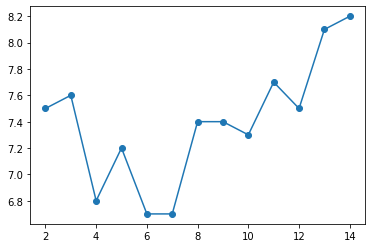

In [22]:
# déterminons le K optimal
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

In [34]:
ytrain[4]

'4'

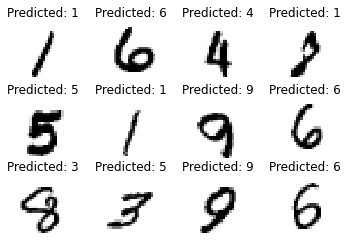

In [31]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(6)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

# On redimensionne les données sous forme d'images
images = xtest.reshape((-1, 28, 28))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)

# On affiche les images avec la prédiction associée
fig,ax = plt.subplots(3,4)

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( predicted[value]) )

plt.show()

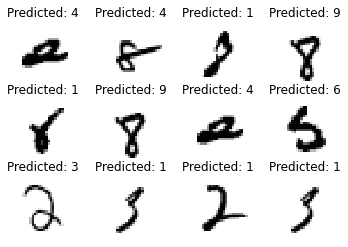

In [36]:
# on récupère les données mal prédites 
misclass = (ytest != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]

# on sélectionne un échantillon de ces images
select = np.random.randint(misclass_images.shape[0], size=12)

# on affiche les images et les prédictions (erronées) associées à ces images
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(misclass_predicted[value]) )

plt.show()